# PW Dual Hamiltonian

In [61]:
import cirq
import numpy as np
import cirq_qubitization
import cirq_qubitization.cirq_infra.testing as cq_testing
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq
from typing import *

## `SelectChem`
#### Parameters
 - `cv1`: Whether the first bit is a positive control.
 - `cv2`: Whether the second bit is a positive control. 

Registers:

References:

In [62]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectChem

M = 8
bloq = SelectChem(8)
show_bloq(bloq)

TypeError: SelectChem.__init__() missing 3 required positional arguments: 'k_bitsize', 'p_bitsize', and 'target_bitsize'

## `PrepareChem`
PrepareChem Bloq
Args:

Registers:

#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


In [ ]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import PrepareChem

M = 8
bloq = PrepareChem(M)
show_bloq(bloq)

## `UnaryIteration`
Placeholder for unary iteration bloq
#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


In [ ]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import UnaryIteration

shape = (2, 3, 5)
bloq = UnaryIteration(shape, 9)
show_bloq(bloq)

## `SelectedMajoranaFermion`
SelectMajoranaFermion Bloq
Args:

Registers:

#### References
(Encoding Electronic Spectra in Quantum Circuits with Linear T Complexity)[https://arxiv.org/abs/1805.03662]. Babbush et. al. 2018. Section III.A. and Fig. 4.


In [ ]:
import numpy as np

from cirq_qubitization.bloq_algos.basic_gates import XGate
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectedMajoranaFermion

# selection_desc = (("sel_reg", (3, )), ("alpha", (2,)))
# selection_desc = (("sel_reg", (8, 8, 8)), ("alpha", (2,)))
from sympy import Symbol
pmax = Symbol("N")
selection_desc = (("px", pmax), ("py", pmax), ("pz", pmax), ("alpha", Symbol("2")))
target_desc = ("target", Symbol("2N^3"))
bloq = SelectedMajoranaFermion(selection_desc, target_desc, XGate())
show_bloq(bloq)

In [ ]:
cbloq = SelectedMajoranaFermion(selection_desc, target_desc, XGate()).decompose_bloq()
show_bloq(cbloq)

In [ ]:
from cirq_qubitization.quantum_graph.bloq_counts import get_counts_graph, print_counts_graph, \
    GraphvizCounts, markdown_bloq_expr, markdown_counts_graph, SympySymbolAllocator
graph, sigma = get_counts_graph(SelectedMajoranaFermion(selection_desc, target_desc, XGate()))
print_counts_graph(graph)
GraphvizCounts(graph).get_svg()

In [ ]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import SelectChemFromCirq

M = 2
cbloq = SelectChemFromCirq(M).decompose_bloq()
show_bloq(cbloq)

In [ ]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import PrepareBloq
import sympy
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq

l = sympy.Symbol("N_k * N")
q = sympy.Symbol("N_k")
regs = [l]
outp = [q]
qrom = tuple(sympy.log(s) for s in regs)
output = tuple(sympy.log(s) for s in outp)
bl = PrepareBloq(qrom_bitsizes=qrom, output_bitsizes=output)
show_bloq(bl)
s = sympy.Symbol("N N_k")
k = sympy.Symbol("N_k")
p = sympy.Symbol("N")
q = sympy.Symbol("N")
re_im = sympy.Symbol("1")
regs = [k, p, q, re_im]
sel_bs = sympy.log(s)
qrom = tuple(sympy.log(s) for s in regs)
bl = PrepareBloq(qrom_bitsizes=qrom, output_bitsizes=output, selection_bitsizes=(sel_bs,))
show_bloq(bl)

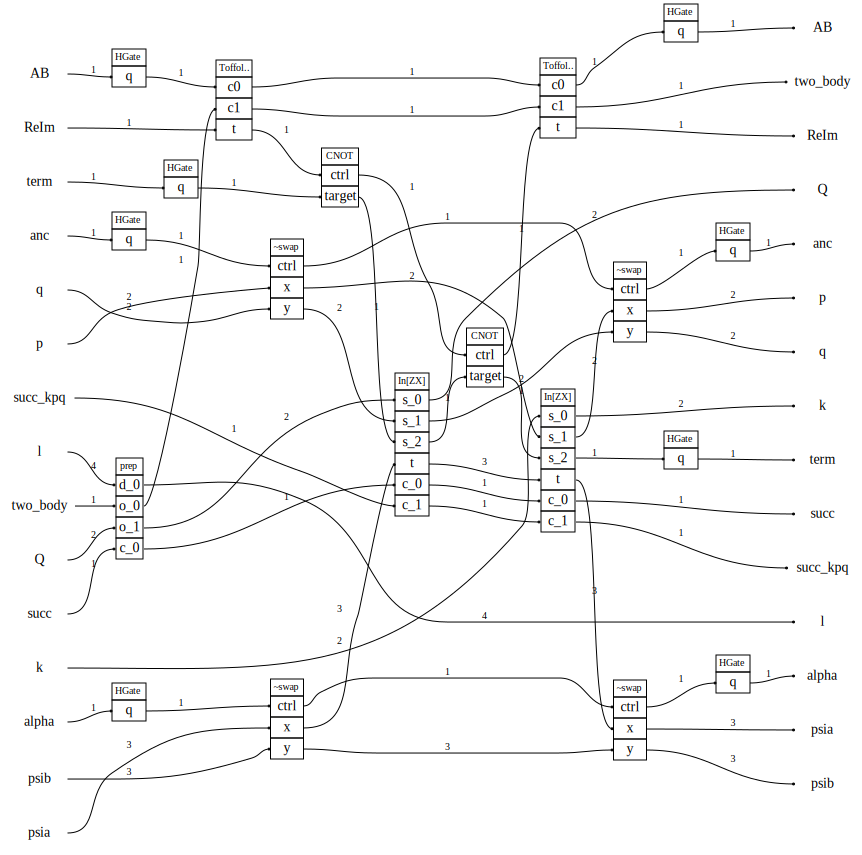

In [63]:
from cirq_qubitization.bloq_algos.chemistry.pw_dual import BlockEncoding 
import sympy
from cirq_qubitization.jupyter_tools import display_gate_and_compilation, show_bloq

bl = BlockEncoding(l_bitsize=4, k_bitsize=2, p_bitsize=2, target_bitsize=3)
show_bloq(bl.decompose_bloq())